In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le=LabelEncoder()

In [62]:
df['Species']=le.fit_transform(df['Species'])

In [63]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [64]:
X=df[['SepalWidthCm','SepalLengthCm','PetalWidthCm','PetalLengthCm']]
X

,SepalWidthCm,SepalLengthCm,PetalWidthCm,PetalLengthCm
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4
...,...,...,...,...
145,3.0,6.7,2.3,5.2
146,2.5,6.3,1.9,5.0
147,3.0,6.5,2.0,5.2
148,3.4,6.2,2.3,5.4


In [65]:
Y=df['Species']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [66]:
#splitting dataset into training and testing set

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [69]:
#data transformation of independent variables

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()

In [72]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [73]:
#Creating a GaussianNB model
from sklearn.naive_bayes import GaussianNB

In [74]:
model=GaussianNB()

In [75]:
model.fit(x_train,y_train)

GaussianNB()

In [76]:
#predicting model based on independent variable 
y_pred=model.predict(x_test)

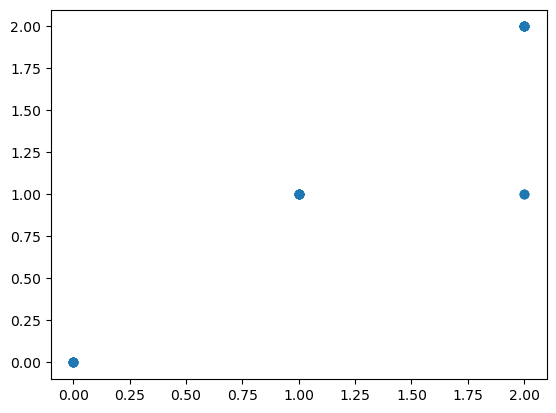

In [77]:
plt.scatter(y_test,y_pred)

In [78]:
#Creating a confusion matrix and Confusion Matrix Display 

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
cm=confusion_matrix(y_test,y_pred)


In [81]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(f"True Positive : {TP}")
print(f"True Negative : {TN}")
print(f"False Positive : {FP}")
print(f"False Negative : {FN}")

True Positive : 9
True Negative : 8
False Positive : 0
False Negative : 0


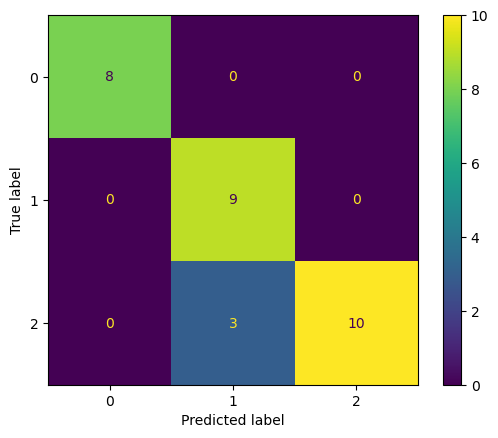

In [84]:
configDisp=ConfusionMatrixDisplay(cm)
configDisp.plot()

In [88]:
#Parameters 
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

In [89]:
acc

0.9

In [90]:
#using Formulae
acc=(TP+TN)/(TP+TN+FP+FN)
acc

1.0

In [91]:
errRate=1-acc

In [92]:
errRate

0.0

In [93]:
#precision 
precision=TP/(TP+FP)
precision

1.0

In [94]:
recall=TP/(TP+FN)
recall

1.0